## Computer Vision API can do the following:
#### - Analyze an image for tags, text description, faces, adult content, and more.
#### - Recognize printed and handwritten text with the Batch Read API.

#### 1, first creat a cognitive services resource in the portal
#### 2, Configure an environment variable for authentication https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-apis-create-account?tabs=multiservice%2Cwindows#configure-an-environment-variable-for-authentication

In [4]:
!export COGNITIVE_SERVICE_KEY="de11057a3e2849a09dfe5d0f717d98ab"
!source ~/.bashrc

#### 3, install the azure client library

In [6]:
# !pip install --upgrade azure-cognitiveservices-vision-computervision

#### 4, code in python

In [8]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import TextOperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import TextRecognitionMode
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time
endpoint= 'https://computer-vision-api-test.cognitiveservices.azure.com/'
subscription_key= 'de11057a3e2849a09dfe5d0f717d98ab'
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [9]:
remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

## Describe an Image
#### This example describes the contents of an image with the confidence score.


In [10]:
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a castle on top of Colosseum' with confidence 85.91%


## Get image category
#### This example extracts (general) categories from a remote image with a confidence score.
#### categories: https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-categorizing-images

In [11]:
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'building_' with confidence 31.64%
'others_' with confidence 0.39%
'outdoor_' with confidence 3.91%


## Tag an Image
This example returns a tag (key word) for each thing in the image.
Tags: https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-tagging-images

In [12]:
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'building' with confidence 99.91%
'outdoor' with confidence 97.70%
'sky' with confidence 92.28%
'ruins' with confidence 74.92%
'amphitheatre' with confidence 57.22%
'city' with confidence 52.15%


## Object Detection
#### The following code detects common objects in the image and prints them to the console
#### more details: https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-object-detection

In [18]:
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print(object.object_property, "at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====
Detecting objects in remote image:
shirts at location 213, 365, 85, 208
Jeans at location 218, 402, 179, 384
Skateboard at location 238, 417, 298, 416
person at location 116, 419, 60, 386


In [22]:
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
# remote_image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/gray-shirt-logo.jpg"
remote_image_url = open('1.jpg', 'rb')

# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image_in_stream(remote_image_url, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
No brands detected.


## Face Detection

In [24]:
print("===== Detect Faces - remote =====")
# Get an image with faces
# remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
remote_image_url_faces= open('faces.jpg', 'rb')
# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image_in_stream(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

===== Detect Faces - remote =====
Faces in the remote image: 
'Male' of age 39 at location 118, 159, 212, 253
'Male' of age 54 at location 492, 111, 582, 201
'Female' of age 55 at location 18, 153, 102, 237
'Female' of age 33 at location 386, 166, 467, 247
'Female' of age 18 at location 235, 158, 311, 234
'Female' of age 8 at location 323, 163, 391, 231


## Domain-specific detection: celebrities in People + landmarks in buildings

In [27]:
local_image_path='Jack_Ma.jpg'
print("===== Detect Domain-specific Content - local =====")
# Open local image file containing a celebtriy
local_image = open(local_image_path, "rb")
# Call API with the type of content (celebrities) and local image
detect_domain_results_celebs_local = computervision_client.analyze_image_by_domain_in_stream("celebrities", local_image)

# Print which celebrities (if any) were detected
print("Celebrities in the local image:")
if len(detect_domain_results_celebs_local.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_local.result["celebrities"]:
        print(celeb["name"])


===== Detect Domain-specific Content - local =====
Celebrities in the local image:
Jack Ma


In [28]:
# Open local image file containing a landmark
local_image_path_landmark = "great-wall-china.jpg"
local_image_landmark = open(local_image_path_landmark, "rb")
# Call API with type of content (landmark) and local image
detect_domain_results_landmark_local = computervision_client.analyze_image_by_domain_in_stream("landmarks", local_image_landmark)
print()

# Print results of landmark detected
print("Landmarks in the local image:")
if len(detect_domain_results_landmark_local.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmark_local.result["landmarks"]:
        print(landmark["name"])
print()


Landmarks in the local image:
Badaling



## Read printed and handwritten text
Computer Vision can read visible text in an image and convert it to a character stream. You do this in two parts.
#### 1, Call the Read API
First, use the following code to call the batch_read_file method for the given image. This returns an operation ID and starts an asynchronous process to read the content of the image.

In [30]:
print("===== Batch Read File - remote =====")
# Get an image with printed text
remote_image_printed_text_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/printed_text.jpg"

# Call API with URL and raw response (allows you to get the operation location)
recognize_printed_results = computervision_client.batch_read_file(remote_image_printed_text_url,  raw=True)

===== Batch Read File - remote =====


#### 2, Get Read results
Next, get the operation ID returned from the batch_read_file call, and use it to query the service for operation results. The following code checks the operation at one-second intervals until the results are returned. It then prints the extracted text data to the console.

In [37]:
# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_printed_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_printed_text_results = computervision_client.get_read_operation_result(operation_id)
    if get_printed_text_results.status not in ['NotStarted', 'Running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_printed_text_results.status == TextOperationStatusCodes.succeeded:
    for text_result in get_printed_text_results.recognition_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

Nutrition Facts Amount Per Serving
[144.0, 0.0, 1238.0, 211.0, 1224.0, 280.0, 130.0, 57.0]
Serving size: 1 bar (40g)
[110.0, 58.0, 598.0, 157.0, 587.0, 206.0, 100.0, 108.0]
Serving Per Package: 4
[83.0, 108.0, 548.0, 206.0, 538.0, 256.0, 72.0, 157.0]
Total Fat 13g
[683.0, 213.0, 1000.0, 286.0, 989.0, 332.0, 672.0, 260.0]
Saturated Fat 1.5g
[695.0, 295.0, 1120.0, 394.0, 1108.0, 447.0, 683.0, 347.0]
Amount Per Serving
[29.0, 207.0, 491.0, 309.0, 478.0, 367.0, 16.0, 265.0]
Trans Fat 0g
[668.0, 363.0, 954.0, 435.0, 940.0, 488.0, 655.0, 416.0]
alories 190
[8.0, 293.0, 265.0, 350.0, 254.0, 396.0, 0.0, 339.0]
Cholesterol Omg
[593.0, 424.0, 1007.0, 526.0, 993.0, 580.0, 579.0, 479.0]
ories from Fat 110
[9.0, 377.0, 398.0, 464.0, 388.0, 509.0, 0.0, 421.0]
Sodium 20mg
[561.0, 497.0, 913.0, 588.0, 899.0, 643.0, 547.0, 552.0]
nt Daily Values are based on
[7.0, 476.0, 521.0, 598.0, 511.0, 640.0, 0.0, 518.0]
Vitamin A 50%
[525.0, 597.0, 776.0, 657.0, 766.0, 699.0, 514.0, 640.0]
calorie diet.
[12.0, 5

## Recognize Printed Text with OCR - local
This example will extract, using OCR, printed text in an image, then print results line by line.

In [36]:
print("===== Detect Printed Text with OCR - local =====")
# Get an image with printed text
local_image_printed_text_path = "printed_text.jpg"
local_image_printed_text = open(local_image_printed_text_path, "rb")

ocr_result_local = computervision_client.recognize_printed_text_in_stream(local_image_printed_text)
for region in ocr_result_local.regions:
    for line in region.lines:
        print("Bounding box: {}".format(line.bounding_box))
        s = ""
        for word in line.words:
            s += word.text + " "
        print(s)
print()

===== Detect Printed Text with OCR - local =====
Bounding box: 79,94,1109,81
Nutrition Facts Amount Per Serving 
Bounding box: 220,171,334,51
see: bar (40g) 
Bounding box: 654,205,321,50
Total Fat 13g 
Bounding box: 45,230,473,56
Servng Per Package: 4 
Bounding box: 682,287,433,50
Saturated t 1.5 g 
Bounding box: 11,347,474,50
Amount Per Serving 
Bounding box: 19,436,256,43
alories 190 
Bounding box: 32,517,397,43
ories from Fat 110 
Bounding box: 72,618,394,41
t Daily Values are based 
Bounding box: 673,362,289,53
Trans Fat Og 
Bounding box: 613,438,422,60
Cholesterol Omg 
Bounding box: 598,517,358,53
Sodium 20mq 



## Comparison between batch read and OCR

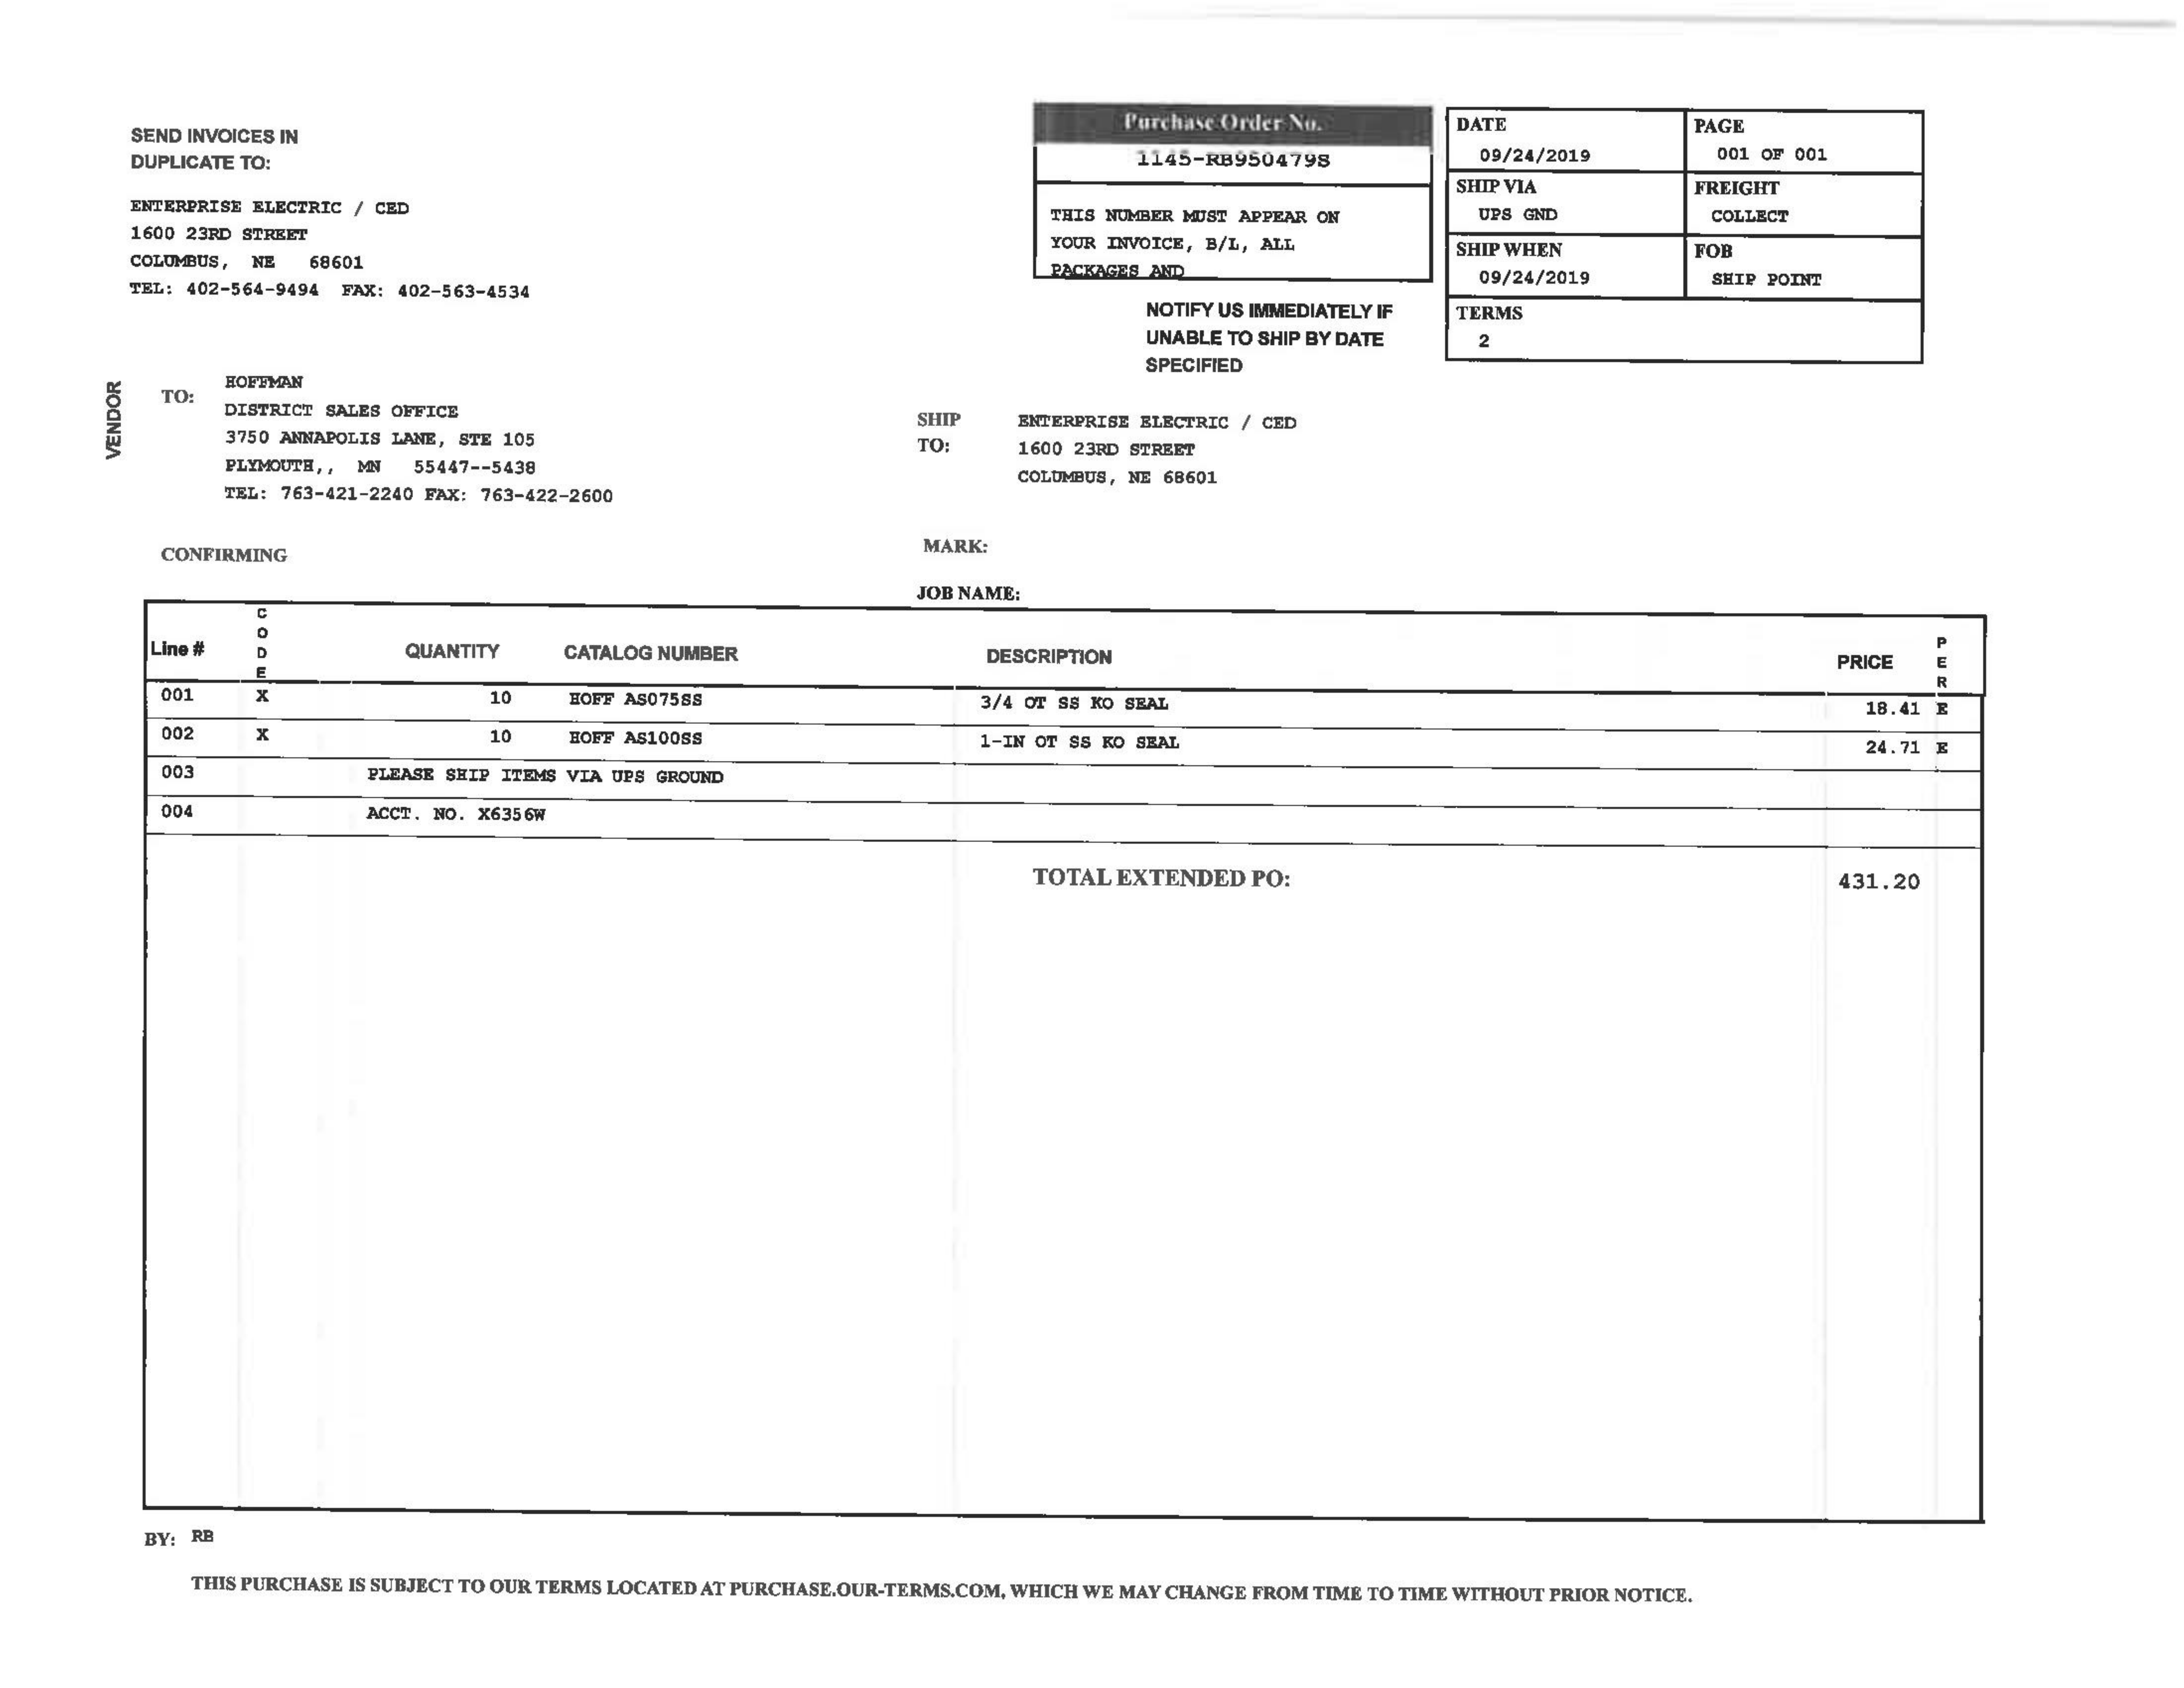

In [40]:
from pdf2image import convert_from_path
pages = convert_from_path('template_1.pdf')
pages[0]

In [41]:
pages[0].save('temp.jpg')

In [44]:
print("===== Batch Read File - remote =====")
# Get an image with printed text
# remote_image_printed_text_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/printed_text.jpg"
remote_image_printed_text_url =open('temp.jpg', 'rb')
# Call API with URL and raw response (allows you to get the operation location)
recognize_printed_results = computervision_client.batch_read_file_in_stream(remote_image_printed_text_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_printed_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_printed_text_results = computervision_client.get_read_operation_result(operation_id)
    if get_printed_text_results.status not in ['NotStarted', 'Running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_printed_text_results.status == TextOperationStatusCodes.succeeded:
    for text_result in get_printed_text_results.recognition_results:
        for line in text_result.lines:
            print(line.text)
#             print(line.bounding_box)
print()

===== Batch Read File - remote =====
DATE
PAGE
SEND INVOICES IN
Purchase Order No.
DUPLICATE TO:
1145-RB9504798
09/24/2019
001 OF 001
SHIP VIA
FREIGHT
ENTERPRISE ELECTRIC / CED
THIS NUMBER MUST APPEAR ON
UPS GND
COLLECT
1600 23RD STREET
YOUR INVOICE, B/L, ALL
SHIP WHEN
FOR
COLUMBUS, NE 68601
PACKAGES AND
09/24/2019
SHIP POINT
TEL: 402-564-9494 FAX: 402-563-4534
NOTIFY US IMMEDIATELY IF
TERMS
UNABLE TO SHIP BY DATE
2
SPECIFIED
VENDOR
TO:
HOFFMAN
DISTRICT SALES OFFICE
SHIP
ENTERPRISE ELECTRIC / CED
3750 ANNAPOLIS LANE, STE 105
TO:
1600 23RD STREET
PLYMOUTH, , MN 55447--5438
COLUMBUS, NE 68601
TEL: 763-421-2240 FAX: 763-422-2600
CONFIRMING
MARK:
JOB NAME:
Line #
001
xmoon
QUANTITY
CATALOG NUMBER
DESCRIPTION
PRICE
10
HOFF AS075SS
3/4 OT SS KO SEAL
18 . 41 E
002
10
HOFF AS100SS
1-IN OT SS KO SEAL
24 . 71 E
003
PLEASE SHIP ITEMS VIA UPS GROUND
004
ACCT. NO. X635 6
TOTAL EXTENDED PO:
431. 20
BY: RB
THIS PURCHASE IS SUBJECT TO OUR TERMS LOCATED AT PURCHASE. OUR-TERMS.COM, WHICH WE MAY CHANGE F

In [59]:
print("===== Detect Printed Text with OCR - local =====")
# Get an image with printed text
local_image_printed_text_path = "temp2.jpg"
local_image_printed_text = open(local_image_printed_text_path, "rb")

ocr_result_local = computervision_client.recognize_printed_text_in_stream(local_image_printed_text)
for region in ocr_result_local.regions:
    for line in region.lines:
#         print("Bounding box: {}".format(line.bounding_box))
        s = ""
        for word in line.words:
            s += word.text + " "
        print(s)
print()

===== Detect Printed Text with OCR - local =====
o 
SEND INVOICES IN 
DUPLICATE TO: 
ENTERPRISE ELECTRIC / CED 
1600 23ü snEærr 
COLmaos, NE 68601 
402-564-9494 FAX: 402-563-4534 
BOE'hAN 
TO: 
DISTRICFII SALES OFFICE 
3750 ANNAPOLIS LANE, STE 105 
PLYMOUTÄ, 55447--5438 
TEL: 763-421-2240 FAX: 763-422-2600 
CONFIRMING 
J'urchasc Onlcr Xo. 
ii4S-RzyS047ys 
THIS NthßER ON 
mt01CE, B/L, ALL 
YOUR 
NOTIFY US IWEDIATELY IF 
UNABLE TO SHIP BY DATE 
SPECIFIED 
ENTERPRISE ELECI'RIC / CED 
1600 23u STREET 
COLD>EUS, NE 68601 
DATE 
09/24/2019 
SHIP VIA 
UPS GND 
SHIP WHEN 
09/24/2019 
TERMS 
2 
PAGE 
001 OF 001 
FREIGHT 
COLLECT 
FOB 
SKIP POINT 
SHIP 
TO: 
Line # 
001 
002 
003 
004 
c 
o 
x 
x 
QUANTITY 
CATALOG NUMBER 
10 
ZOFF AS075SS 
10 
HOFF ASIOOSS 
PLEASE SEXP VIA UPS GROUND 
ACCT. NO. X6356W 
MARK: 
JOB NAME: 
DESCRIPTION 
3/4 0T SS XO SAL 
I-IN OT SS KO SEAL 
TOTAL EXTENDED PO: 
p 
PRICE 
18.41 E 
24.71 E 
431.20 
THIS PURCHASE IS SUBJECT TO OUR TERMS LOCATED AT PURCHASE.OUR-TERMS.CO

In [57]:
import cv2
img= cv2.imread( "temp2.jpg")
img.shape

(2833, 3667, 3)

In [56]:
import cv2
 
img = cv2.imread("temp.jpg", cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized.shape
img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
im_pil = Image.fromarray(img)
im_pil.save('temp2.jpg')

Original Dimensions :  (4723, 6112, 3)
